# Importing Required Libraries

In [7]:
import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

Importing the Dataset

In [2]:
data = pd.read_csv('Champagne.csv')
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


Creating a date range

In [3]:
dates = pd.date_range(start='1964-01-01', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [4]:
data.set_index(dates,inplace=True)

In [5]:
sales_ts = data['Sales']

In [6]:
sales_ts[0:5]

1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Freq: MS, Name: Sales, dtype: int64

# Stationarity

Detecting stationarity by creating subplots with 4,6,8, and 12 month moving average

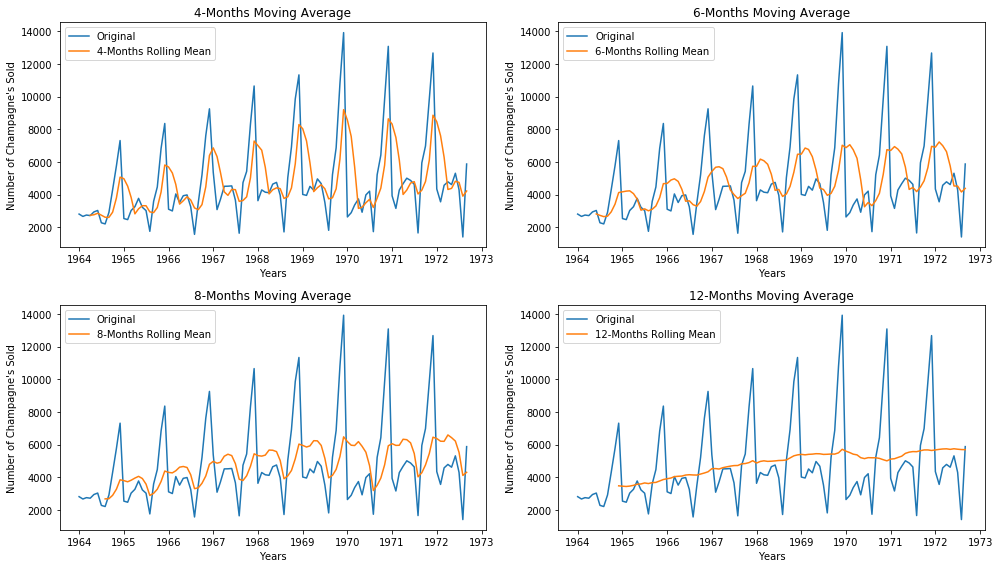

In [9]:
#Creating the subplot placeholders
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

#4 month MA
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Champagne's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

#6 month MA
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Champagne's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

#8 month MA
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Champagne's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

#12 month MA
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Champagne's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


We can observe that there is a monthly pattern from the moving average plots.

# Determing rolling statistics

In [10]:
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

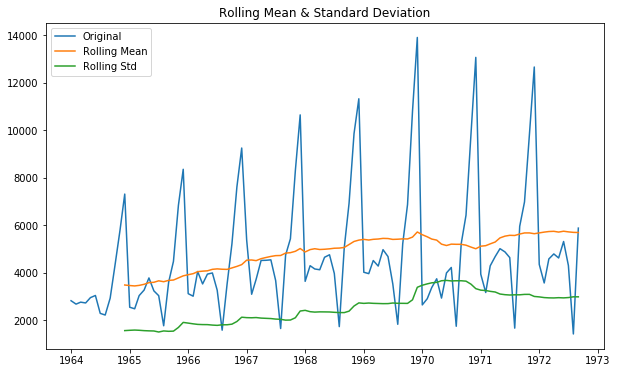

In [12]:
#Plot rolling statistics:
plt.figure(figsize=(10,6))
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Dickey-Fuller Test

Dicky Fuller Test on the timeseries will help us to verify the Time-Series is stationary or not

 Null Hypothesis (H0)     : Fail to reject null (i.e) the time series is non-stationary. 
 
 Alternate Hypothesis (HA): The null hypothesis is rejected; it suggests the time series is stationary.

In [14]:
dftest = adfuller(sales_ts)
dftest

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

### Inference:
      1) We can interpret this result using the Test-Statistic from the test.
      2) If the test statistic is less than the critical value, we should reject the null hypothesis.
      3) In our case, the test statistic > critical value, which implies that the series is not stationary.
      4) P-value is also > 0.05 so the data is not stationary.

# Differencing and Log Transforming to remove stationarity

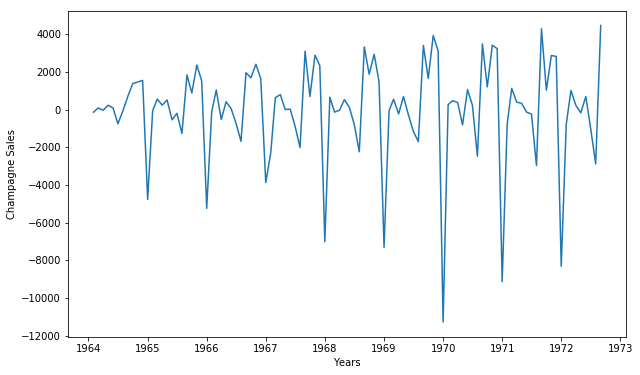

In [25]:
#Differencing once to remove trend
plt.figure(figsize=(10, 6))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Champagne Sales')
plt.show()

Although the trend is removed after differencing, there is unequal variance which implies that the series is not stationary.
we will apply log transform.

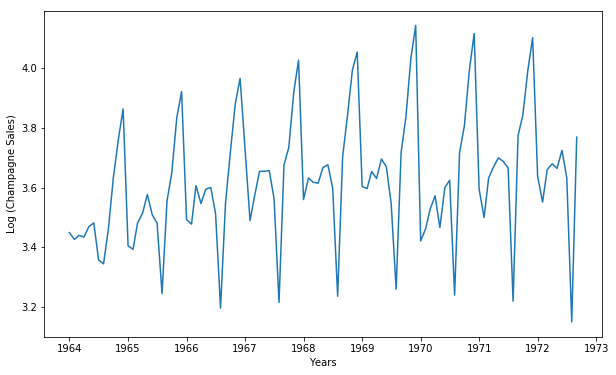

In [27]:
#Log of time series
plt.figure(figsize=(10, 6))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Champagne Sales)')
plt.show()

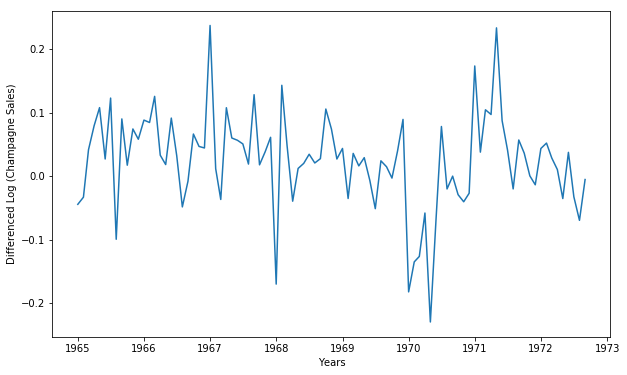

In [36]:
#Difference of log
plt.figure(figsize=(10, 6))
plt.plot(np.log10(sales_ts).diff(periods=12))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Champagne Sales)')
plt.show()

#### we can see a constant mean as well as constant variance in th series now

In [32]:
#Log of the time series
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

#Diff of the log
sales_ts_log_diff = sales_ts_log.diff(periods=12) 
sales_ts_log_diff.dropna(inplace=True)

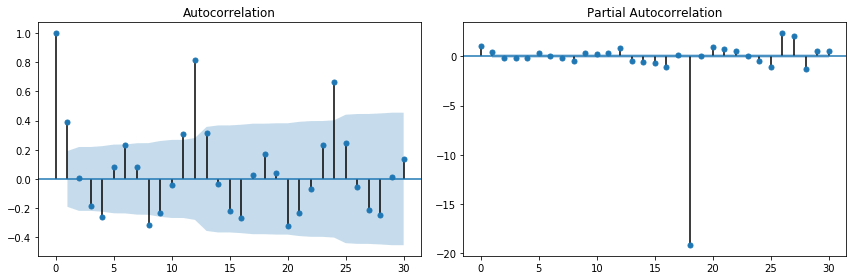

In [33]:
##ACF and PACF plots of the log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

#### The ACF plot with significant lags shows there is a trend in the series

#### The PACF plot shows there is no seasonality

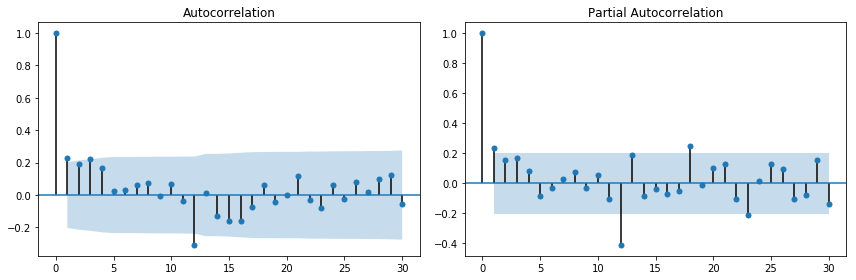

In [34]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

#### The differencing has removed the trend in the series, as seen by the ACF and PACF plots. however lag 12 may indicate seasonality in the data

ADF Test for the differenced log series

In [35]:
dftest = adfuller(sales_ts_log_diff)
dftest

(-3.617320904920113,
 0.005438393674347564,
 2,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 -187.3632325832342)

# Inference:
###      1) The test statistic is < the critical values, hence we reject the null hypothesis(i.e) the data is not stationary.
###      2) P-value is also < 0.05 which indicates the data is stationary.